#### Mini project: Predicting insurance charges using logistic regression

#### Problem Statement:
 The main goal is to predict insurance charges using logistic regression and understand the factors, such as age, BMI, gender, and smoking habits, that influence these charges. This will help in making better data-driven decisions.


#### Data collection:
Use the Kaggle to download the dataset for insurance charges, which includes various features, download it from Kaggle.
https://www.kaggle.com/datasets/mirichoi0218/insurance

#### Step 1: Import Libraries

In [14]:
# Importing libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns        # For advanced visualizations
import folium                # For geographical mapping
from sklearn.linear_model import LogisticRegression  # For machine learning

#### Step 2: Load the Dataset

In [18]:
data = pd.read_csv(r"C:\Users\NSTIW\Desktop\padmavthik\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [24]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Step 3: Explore the Data

In [27]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [29]:
# Display summary statistics for numerical columns
print("Statistical summary:")
print(data.describe())

Statistical summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [31]:
# Show the data types for each column
print("Column data types:")
print(data.dtypes)

Column data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


#### Step 4: Encode Categorical Variables

In [34]:
# Encode 'sex' and 'smoker' columns into numeric values
data['sex_numeric'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker_numeric'] = data['smoker'].map({'yes': 1, 'no': 0})
#The map() function replaces or modifies values in a column or list using a dictionary or function

print("Dataset after encoding:")
print(data.head())

Dataset after encoding:
   age     sex     bmi  children smoker     region      charges  sex_numeric  \
0   19  female  27.900         0    yes  southwest  16884.92400            0   
1   18    male  33.770         1     no  southeast   1725.55230            1   
2   28    male  33.000         3     no  southeast   4449.46200            1   
3   33    male  22.705         0     no  northwest  21984.47061            1   
4   32    male  28.880         0     no  northwest   3866.85520            1   

   smoker_numeric  
0               1  
1               0  
2               0  
3               0  
4               0  


#### Step 5: Matplotlib Visualizations

#### 1. Gender-Based Charges Pie Chart

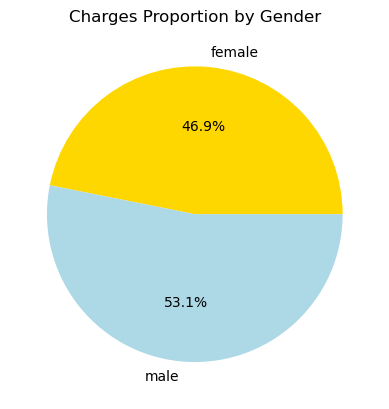

In [38]:
charges_by_sex = data.groupby('sex')['charges'].sum()
charges_by_sex.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue'])
plt.title('Charges Proportion by Gender')
plt.ylabel('')
plt.show()

#### 2.  Charges vs Age Line Plot

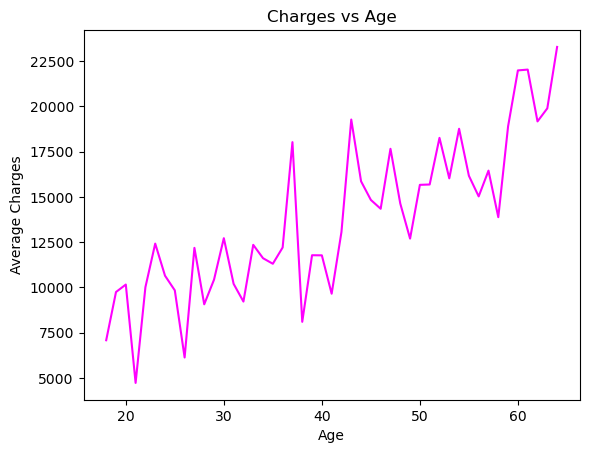

In [41]:
charges_by_age = data.groupby('age')['charges'].mean()
charges_by_age.plot(kind='line', color='magenta')
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.show()

#### 3. Violin Plot for Charges by Sex

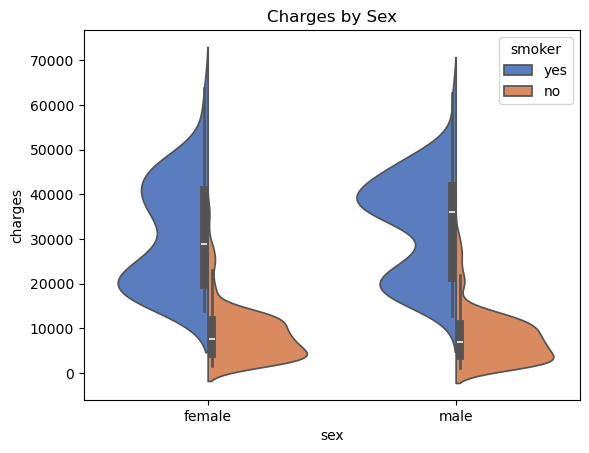

In [44]:
sns.violinplot(x='sex', y='charges', data=data, hue='smoker', split=True, palette='muted')
#hue='smoker' means the plot uses different colors for smokers and non-smokers to compare them
plt.title('Charges by Sex')
plt.show()

#### 4. Charges Box Plot by Number of Children

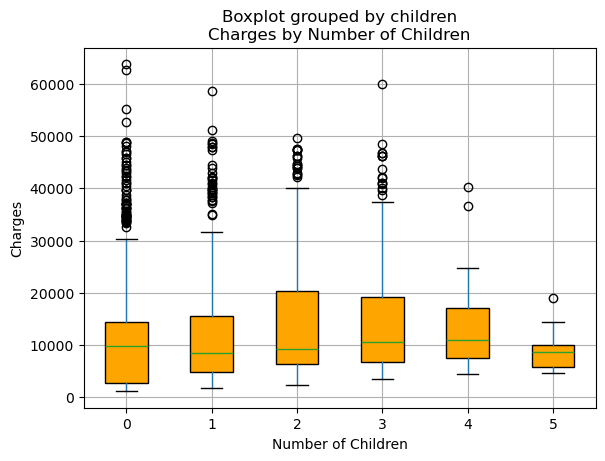

In [47]:
data.boxplot(column='charges', by='children', patch_artist=True, boxprops=dict(facecolor='orange'))
#patch_artist=True used to fills the boxes with color
#boxprops=dict(facecolor='') is used to set the fill color of the boxes in a boxplot
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

#### 5.  Charges Distribution Across Regions with KDE

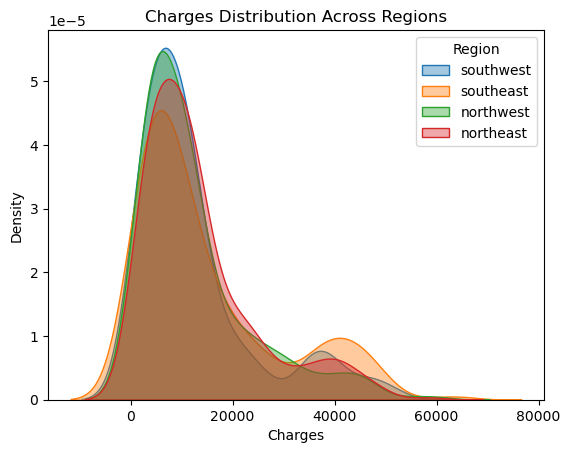

In [50]:
import seaborn as sns

# KDE plot for charges by region
for region in data['region'].unique():
    sns.kdeplot(data[data['region'] == region]['charges'], label=region, fill=True, alpha=0.4)
    #sns.kdeplot makes a smooth curve to show data distribution.
    # It means the element is 40% visible and 60% transparent through the effect.
plt.title('Charges Distribution Across Regions')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend(title='Region')
plt.show()

In [52]:
data.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
sex_numeric         int64
smoker_numeric      int64
dtype: object

#### Step 6: Seaborn Visualizations

#### 1. Correlation Heatmap

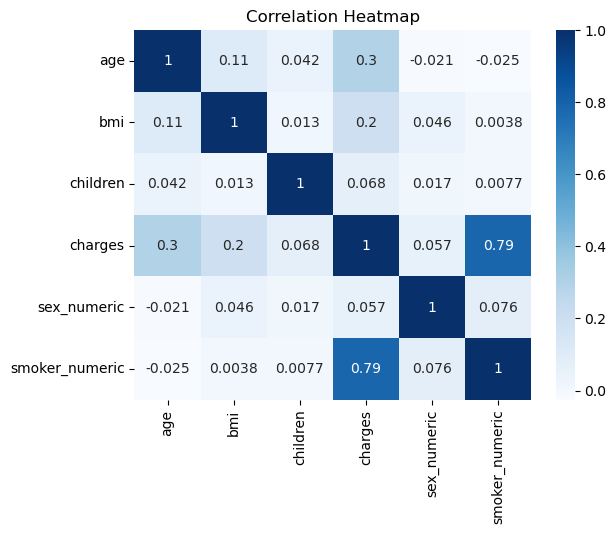

In [56]:
correlation = data[['age', 'bmi', 'children', 'charges', 'sex_numeric', 'smoker_numeric']].corr()
sns.heatmap(correlation, annot=True, cmap='Blues')
#annot=True shows numbers on the plot.
plt.title('Correlation Heatmap')
plt.show()

#### 2. KDE Plot for BMI

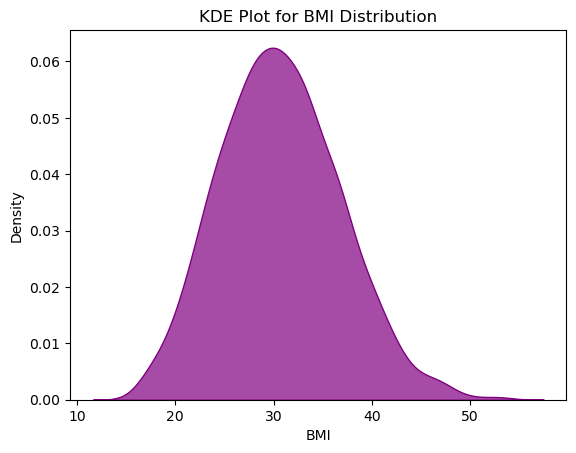

In [59]:
#[Kernel Density Estimate]
#Kdeplot makes a smooth curve to show data distribution
sns.kdeplot(data=data['bmi'], fill=True, color='purple', alpha=0.7)
plt.title('KDE Plot for BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

#### 3. Histogram for Charges

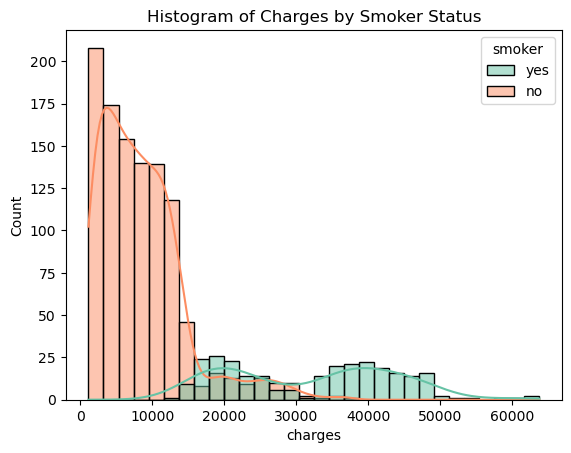

In [62]:
# Histogram for charges with smoker segmentation
sns.histplot(data=data, x='charges', hue='smoker', kde=True, palette='Set2')
# palette='Set2' We don't need to manually assign colors, its automatically takes the colors
plt.title('Histogram of Charges by Smoker Status')
plt.show()

#### 4. Point Plot for Average Charges by Region

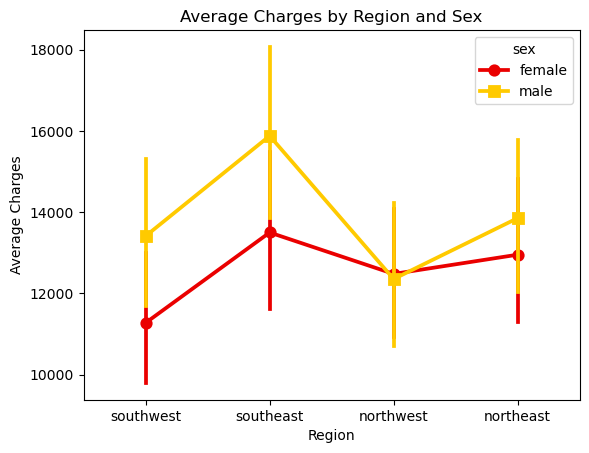

In [65]:
sns.pointplot(x='region', y='charges', data=data, hue='sex', palette='hot', markers=['o', 's'])
#'o' represents circle markers.
#'s' represents square markers.
plt.title('Average Charges by Region and Sex')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

#### 5. Pairplot

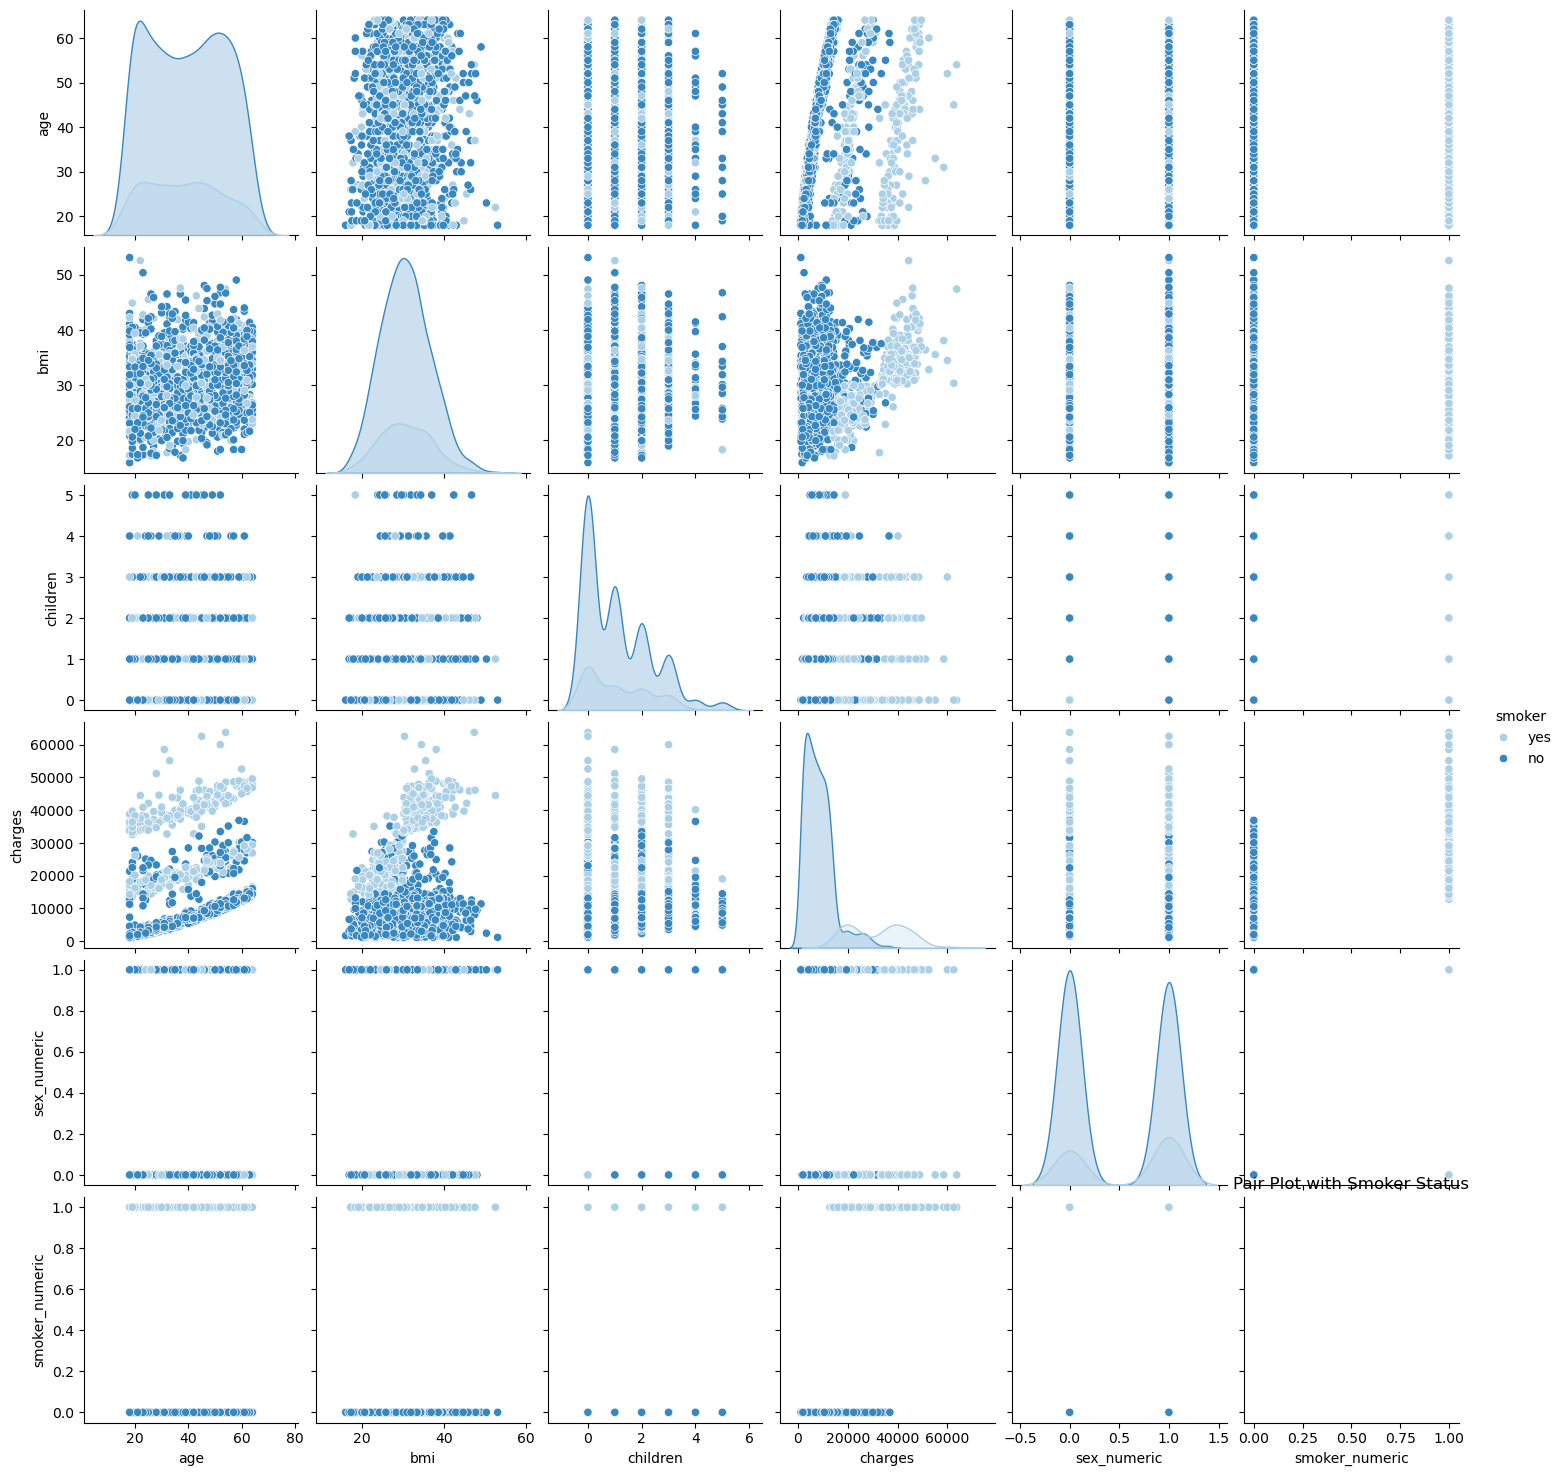

In [72]:
sns.pairplot(data, hue='smoker', palette='Blues')
plt.title('Pair Plot with Smoker Status') 
plt.show()

#### Step 7: Geographical Mapping with Folium

In [70]:
# Create a map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for specific locations
folium.Marker(location=[28.6139, 77.2090], popup='Delhi').add_to(m)
folium.Marker(location=[19.0760, 72.8777], popup='Mumbai').add_to(m)

# Display the map
m

#### Step 8: Logistic Regression

In [79]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#  targets
X = data[['age', 'bmi', 'children', 'sex_numeric']]
y = data['smoker_numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))  
print("\nClassification Report:\n", classification_report(y_test, y_pred))  

Accuracy: 0.7985074626865671

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       214
           1       0.00      0.00      0.00        54

    accuracy                           0.80       268
   macro avg       0.40      0.50      0.44       268
weighted avg       0.64      0.80      0.71       268



C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
